In [2]:
from sklearn.preprocessing import MinMaxScaler  # scaler
from sklearn.model_selection import train_test_split  # data split
from sklearn.neighbors import KNeighborsClassifier    # knn model
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 30)
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch4 KNN/churn.csv'
data = pd.read_csv(data_path)

In [4]:
# 1. Data 전처리 : Numeric 값으로 변환, 값 scaling
col_list = []
for col in data.columns:
  if data[col].dtype == 'O':
    col_list.append(col)
col_list = col_list[1:]

data = pd.get_dummies(data, columns=col_list, drop_first=True)
data.drop('customerID', axis=1, inplace=True)   # inplace : 원본 데이터의 값을 바꿈
data.head(3)  

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,TotalCharges_992.70,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.80,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.10,TotalCharges_999.45,TotalCharges_999.80,TotalCharges_999.90,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
minmax = MinMaxScaler()
minmax.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
scaled_data = minmax.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [7]:
# 2. 데이터 split : train, test 데이터 split
X = scaled_data.drop('Churn_Yes', axis=1)
y = scaled_data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [8]:
# 3. KNN Classfier
knn = KNeighborsClassifier(n_neighbors=10)  # knn 모델 정의

In [9]:
knn.fit(X_train, y_train) # knn 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [10]:
pred = knn.predict(X_test) # knn 모델로 예측

In [11]:
pd.DataFrame({'acutal_value': y_test, 'pred_value': pred })

,acutal_value,pred_value
4880,0.0,0.0
1541,0.0,0.0
1289,0.0,0.0
5745,0.0,0.0
4873,0.0,0.0
...,...,...
1285,1.0,1.0
5092,0.0,0.0
5837,0.0,0.0
3597,0.0,0.0


In [12]:
accuracy_score(y_test, pred)  # 80%미만이라 썩 좋다고는 말하기 힘듦

0.7567439659252247

In [13]:
confusion_matrix(y_test, pred)

array([[1352,  195],
       [ 319,  247]])

In [14]:
error_list = []
for i in range(1, 10): # 최적의 k를 찾기 위함
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  error_list.append(accuracy_score(y_test, pred))

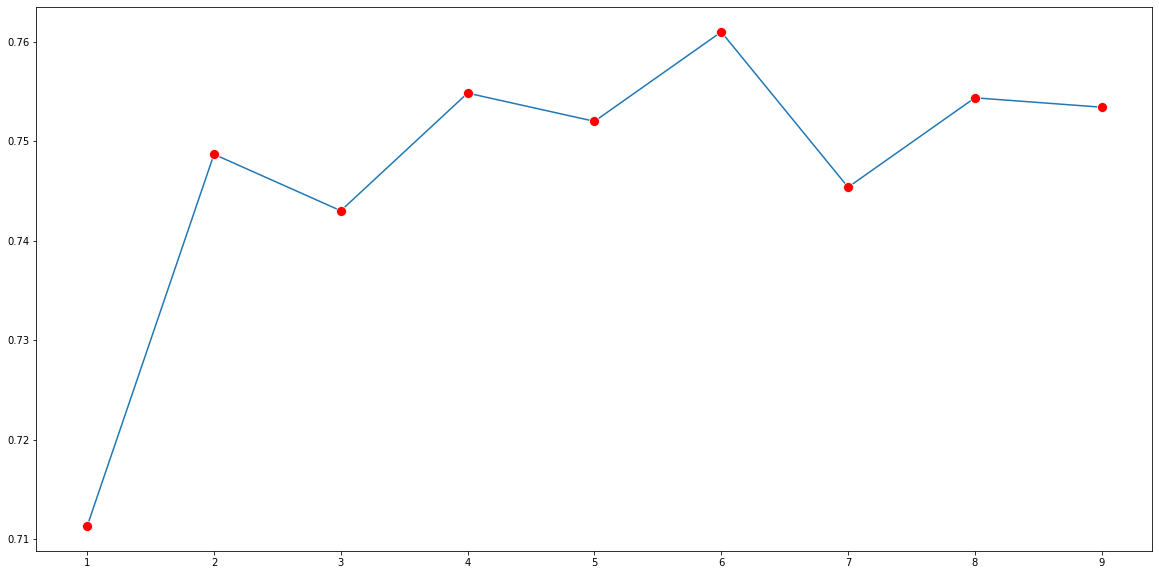

In [20]:
# Error 값 시각화
plt.figure(figsize=(20,10))
sns.lineplot(x=range(1,10), y=error_list, marker ='o', markersize=10, markerfacecolor='red')

In [22]:
# 최대 성능을 얻는 n_neighbor 값 찾기, 아래 둘은 같은 기능을 수행
# max_k = error_list.index(max(error_list))
max_n = np.array(error_list).argmax()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
accracy_score(y_test, pred)

In [ ]:
confusion_matrix(y_test, pred)